# Describing and analyzing time series

Fetch data and describe and analyze time series.

In [5]:
%pip install yfinance

  Using cached yfinance-0.2.48-py2.py3-none-any.whl.metadata (13 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached lxml-5.3.0-cp312-cp312-macosx_10_9_universal2.whl.metadata (3.8 kB)
  Using cached frozendict-2.4.6-py312-none-any.whl.metadata (23 kB)
  Using cached peewee-3.17.7-cp312-cp312-macosx_11_0_arm64.whl
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
  Using cached soupsieve-2.6-py3-none-any.whl.metadata (4.6 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
Using cached yfinance-0.2.48-py2.py3-none-any.whl (101 kB)
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
Using cached frozendict-2.4.6-py312-none-any.whl (16 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached lxml-5.3.0-cp312-cp312-macosx_10_9_universal2.whl (8.2 MB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
Using ca

In [6]:
### Bring the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### For fetching data from Yahoo Finance
import yfinance as yf

### Style affects on layout of graphics

sns.set_style('darkgrid')

## Downloading the data

In [7]:
import yfinance as yf

# Load data for Meta Platforms, Inc. and Snap Inc.

meta = yf.download('META', start='2018-01-01')
snap = yf.download('SNAP', start='2018-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
# take a quick look at meta dataset

meta

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,META,META,META,META,META,META
Date,,,,,,
2018-01-02 00:00:00+00:00,180.875397,181.419998,181.580002,177.550003,177.679993,18151900
2018-01-03 00:00:00+00:00,184.115662,184.669998,184.779999,181.330002,181.880005,16886600
2018-01-04 00:00:00+00:00,183.776672,184.330002,186.210007,184.100006,184.899994,13880900
2018-01-05 00:00:00+00:00,186.289108,186.850006,186.899994,184.929993,185.589996,13574500
2018-01-08 00:00:00+00:00,187.714813,188.279999,188.899994,186.330002,187.199997,17994700
...,...,...,...,...,...,...
2024-10-24 00:00:00+00:00,567.780029,567.780029,568.880005,561.520020,567.130005,7184700
2024-10-25 00:00:00+00:00,573.250000,573.250000,581.289978,571.719971,573.929993,11337900


In [9]:
# take a quick look at snap dataset

snap

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SNAP,SNAP,SNAP,SNAP,SNAP,SNAP
Date,,,,,,
2018-01-02 00:00:00+00:00,14.950,14.950,15.010,14.610,14.69,9971000
2018-01-03 00:00:00+00:00,15.310,15.310,15.380,14.720,15.00,15921400
2018-01-04 00:00:00+00:00,14.590,14.590,15.000,14.274,14.76,27232000
2018-01-05 00:00:00+00:00,14.500,14.500,14.750,14.380,14.51,18828000
2018-01-08 00:00:00+00:00,14.060,14.060,14.280,13.580,14.21,27033600
...,...,...,...,...,...,...
2024-10-24 00:00:00+00:00,10.270,10.270,10.330,10.120,10.20,17213100
2024-10-25 00:00:00+00:00,10.450,10.450,10.540,10.290,10.33,18672500


## Line charts

This section visualizes the historical daily closing prices of Meta and Snap using line charts.

It presents two sets of charts:

1. **Historical prices since 2018:** Shows the overall price trends of Meta and Snap over the past five years.
2. **Historical prices since 2023:** Focuses on the price movements of Meta and Snap from the beginning of 2023.

Each chart displays the closing price in USD on the vertical axis and the date on the horizontal axis, providing insights into the performance of these two stocks over different timeframes.

Text(0, 1, 'USD')

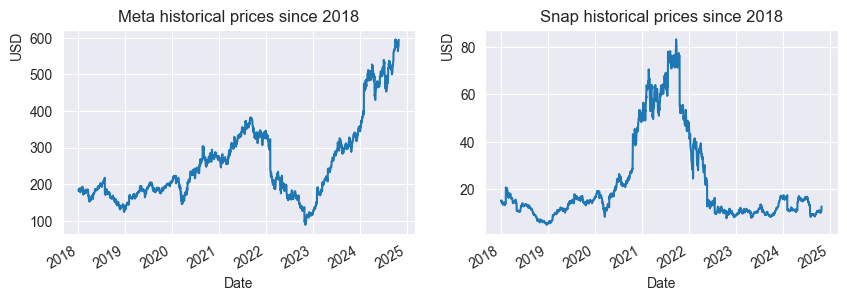

In [10]:
### Plot Meta's and Snap's historical prices, use daily closing prices.

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
meta['Close'].plot(ax=axs[0], legend = False)
snap['Close'].plot(ax=axs[1], legend = False)

### Add title and vertical axis-titles

axs[0].set_title('Meta historical prices since 2018')
axs[1].set_title('Snap historical prices since 2018')

axs[0].set_ylabel('USD', loc='top')
axs[1].set_ylabel('USD', loc='top')


Text(0, 1, 'USD')

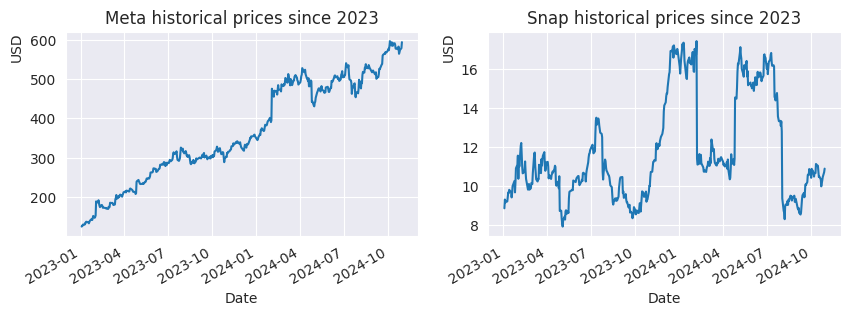

In [37]:
### Plot from the beginning of 2023

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
meta['Close']['2023':].plot(ax=axs[0], legend = False)
snap['Close']['2023':].plot(ax=axs[1], legend = False)

### Add title and axis-titles

axs[0].set_title('Meta historical prices since 2023')
axs[1].set_title('Snap historical prices since 2023')

axs[0].set_ylabel('USD', loc='top')
axs[1].set_ylabel('USD', loc='top')


## Aggregation


This section examines Meta and Snap's stock performance using various time-based aggregations. **Monthly, quarterly**, and **annual** average closing prices are analyzed to identify trends. Additionally, quarterly total trading volume is explored to understand market activity and liquidity

<ipython-input-38-87674cd1de7a>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  meta['Close'].resample('M').mean().plot(ax=axs[0], legend = False)
<ipython-input-38-87674cd1de7a>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  snap['Close'].resample('M').mean().plot(ax=axs[1], legend = False)


Text(0, 1, 'USD')

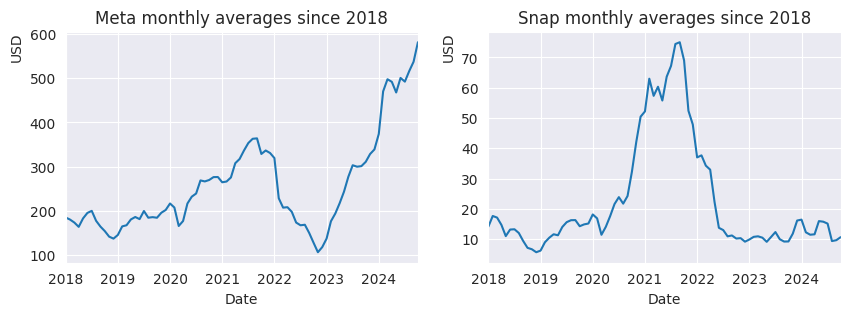

In [38]:
### Calculate monthly average prices using the previous daily data.

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
meta['Close'].resample('M').mean().plot(ax=axs[0], legend = False)
snap['Close'].resample('M').mean().plot(ax=axs[1], legend = False)

### Add title and axis-titles

axs[0].set_title('Meta monthly averages since 2018')
axs[1].set_title('Snap monthly averages since 2018')

axs[0].set_ylabel('USD', loc='top')
axs[1].set_ylabel('USD', loc='top')

<ipython-input-18-f40bf43f4c77>:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  meta['Close'].resample('Q').mean().plot(ax=axs[0], legend = False)
<ipython-input-18-f40bf43f4c77>:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  snap['Close'].resample('Q').mean().plot(ax=axs[1], legend = False)


Text(0, 1, 'USD')

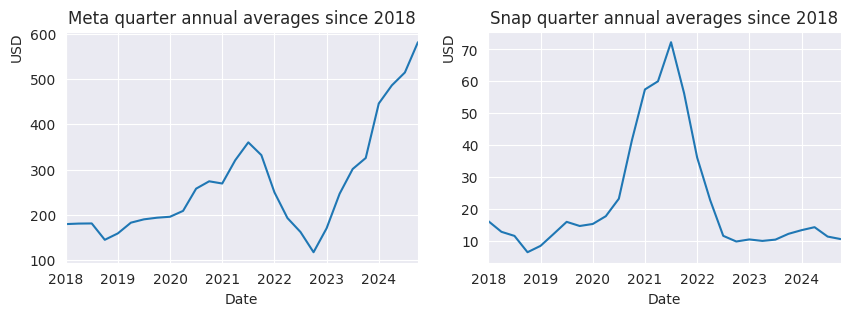

In [18]:
### Quarter annual average prices

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
meta['Close'].resample('Q').mean().plot(ax=axs[0], legend = False)
snap['Close'].resample('Q').mean().plot(ax=axs[1], legend = False)

### Add title and axis-titles

axs[0].set_title('Meta quarter annual averages since 2018')
axs[1].set_title('Snap quarter annual averages since 2018')

axs[0].set_ylabel('USD', loc='top')
axs[1].set_ylabel('USD', loc='top')

<ipython-input-39-c4eaa1a4b389>:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  meta['Close'].resample('Y').mean().plot(ax=axs[0], legend = False)
<ipython-input-39-c4eaa1a4b389>:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  snap['Close'].resample('Y').mean().plot(ax=axs[1], legend = False)


Text(0, 1, 'USD')

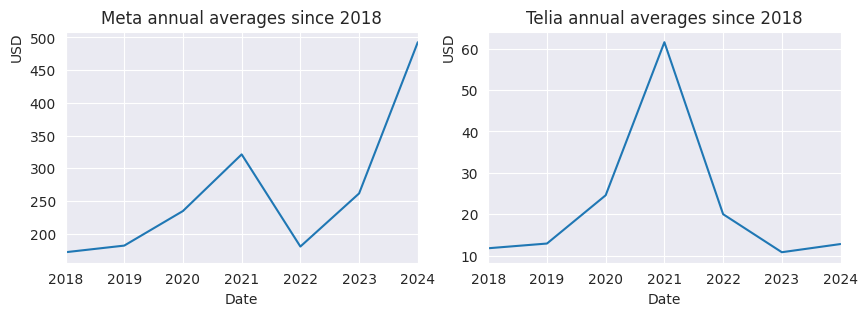

In [39]:
### Annual mean prices

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
meta['Close'].resample('Y').mean().plot(ax=axs[0], legend = False)
snap['Close'].resample('Y').mean().plot(ax=axs[1], legend = False)

### Add title and axis-titles

axs[0].set_title('Meta annual averages since 2018')
axs[1].set_title('Telia annual averages since 2018')

axs[0].set_ylabel('USD', loc='top')
axs[1].set_ylabel('USD', loc='top')

<ipython-input-41-4cb9e4dabd74>:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  (meta['Volume']/1000000000).resample('Q').sum().plot(ax=axs[0], legend = False)
<ipython-input-41-4cb9e4dabd74>:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  (snap['Volume']/1000000000).resample('Q').sum().plot(ax=axs[1], legend = False)


Text(0.5, 1.0, 'Snap volume quarter annually')

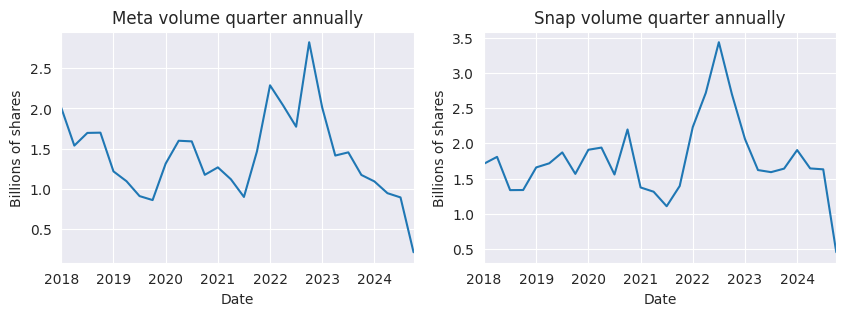

In [41]:
### The number of volume quarter annually (aggregate by addition)
### There may be a sudden drop in the last quarter if the quarter is only beginning

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
(meta['Volume']/1000000000).resample('Q').sum().plot(ax=axs[0], legend = False)
(snap['Volume']/1000000000).resample('Q').sum().plot(ax=axs[1], legend = False)

# set title of y
axs[0].set_ylabel('Billions of shares')
axs[1].set_ylabel('Billions of shares')

# set title of the chart
axs[0].set_title('Meta volume quarter annually')
axs[1].set_title('Snap volume quarter annually')


## Moving average

Moving averages are used to smooth down isolated price spikes.

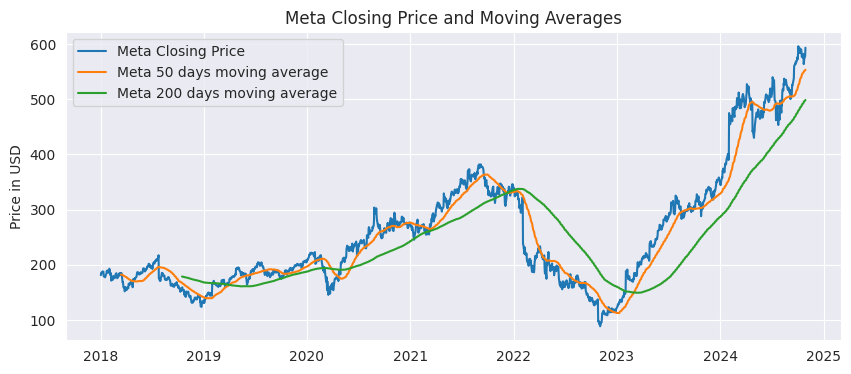

In [66]:
# Plot Meta's closing prices
plt.figure(figsize=(10, 4))
plt.plot(meta['Close'], label='Meta Closing Price')

# Plot Meta's 50 and 200-day moving averages
plt.plot(meta['Close'].rolling(50).mean(), label = 'Meta 50 days moving average')
plt.plot(meta['Close'].rolling(200).mean(), label = 'Meta 200 days moving average')

# Add titles and labels
plt.title('Meta Closing Price and Moving Averages')
plt.ylabel('Price in USD')

plt.legend()
plt.show()

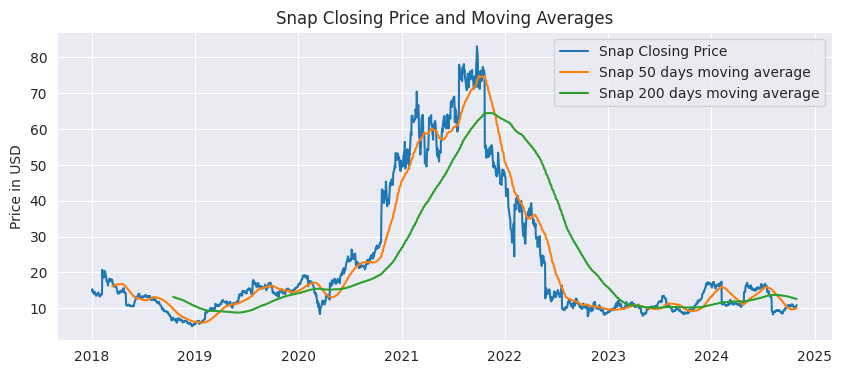

In [67]:
# Plot Meta's closing prices
plt.figure(figsize=(10, 4))
plt.plot(snap['Close'], label='Snap Closing Price')

# Plot Meta's 50 and 200-day moving averages
plt.plot(snap['Close'].rolling(50).mean(), label = 'Snap 50 days moving average')
plt.plot(snap['Close'].rolling(200).mean(), label = 'Snap 200 days moving average')

# Add titles and labels
plt.title('Snap Closing Price and Moving Averages')
plt.ylabel('Price in USD')

plt.legend()
plt.show()

***Analyse:***

## Percentages of change

In [68]:
### Changes of stock prices from the previous day as percentages

meta['Meta-daily%'] = meta['Close'].pct_change()
snap['Snap-daily%'] = snap['Close'].pct_change()

In [70]:
### Dataframes meta and snap now have a new column

meta

Price,Adj Close,Close,High,Low,Open,Volume,Meta-daily%
Ticker,META,META,META,META,META,META,
Date,,,,,,,
2018-01-02 00:00:00+00:00,180.875412,181.419998,181.580002,177.550003,177.679993,18151900,NaN
2018-01-03 00:00:00+00:00,184.115646,184.669998,184.779999,181.330002,181.880005,16886600,0.017914
2018-01-04 00:00:00+00:00,183.776672,184.330002,186.210007,184.100006,184.899994,13880900,-0.001841
2018-01-05 00:00:00+00:00,186.289108,186.850006,186.899994,184.929993,185.589996,13574500,0.013671
2018-01-08 00:00:00+00:00,187.714813,188.279999,188.899994,186.330002,187.199997,17994700,0.007653
...,...,...,...,...,...,...,...
2024-10-23 00:00:00+00:00,563.690002,563.690002,585.000000,562.500000,579.969971,14248400,-0.031477
2024-10-24 00:00:00+00:00,567.780029,567.780029,568.880005,561.520020,567.130005,7184700,0.007256


In [71]:
snap

Price,Adj Close,Close,High,Low,Open,Volume,Snap-daily%
Ticker,SNAP,SNAP,SNAP,SNAP,SNAP,SNAP,
Date,,,,,,,
2018-01-02 00:00:00+00:00,14.95,14.95,15.010,14.610,14.69,9971000,NaN
2018-01-03 00:00:00+00:00,15.31,15.31,15.380,14.720,15.00,15921400,0.024080
2018-01-04 00:00:00+00:00,14.59,14.59,15.000,14.274,14.76,27232000,-0.047028
2018-01-05 00:00:00+00:00,14.50,14.50,14.750,14.380,14.51,18828000,-0.006169
2018-01-08 00:00:00+00:00,14.06,14.06,14.280,13.580,14.21,27033600,-0.030345
...,...,...,...,...,...,...,...
2024-10-23 00:00:00+00:00,10.15,10.15,10.480,10.060,10.21,32444300,0.017034
2024-10-24 00:00:00+00:00,10.27,10.27,10.330,10.120,10.20,17213100,0.011823


In [72]:
### Next add percentage changes into a same dataframe

changes = pd.concat([meta['Meta-daily%'], snap['Snap-daily%']], axis = 1)

### In case there are missing values in closing prices (no sales is done), that results in missing values in percentages of changes as well.
### These missing values can be replaced by a zero percentage of change using the function fillna as follows:

changes = changes.fillna(0)

### See the result

changes


,Meta-daily%,Snap-daily%
Date,,
2018-01-02 00:00:00+00:00,0.000000,0.000000
2018-01-03 00:00:00+00:00,0.017914,0.024080
2018-01-04 00:00:00+00:00,-0.001841,-0.047028
2018-01-05 00:00:00+00:00,0.013671,-0.006169
2018-01-08 00:00:00+00:00,0.007653,-0.030345
...,...,...
2024-10-23 00:00:00+00:00,-0.031477,0.017034
2024-10-24 00:00:00+00:00,0.007256,0.011823
2024-10-25 00:00:00+00:00,0.009634,0.017527


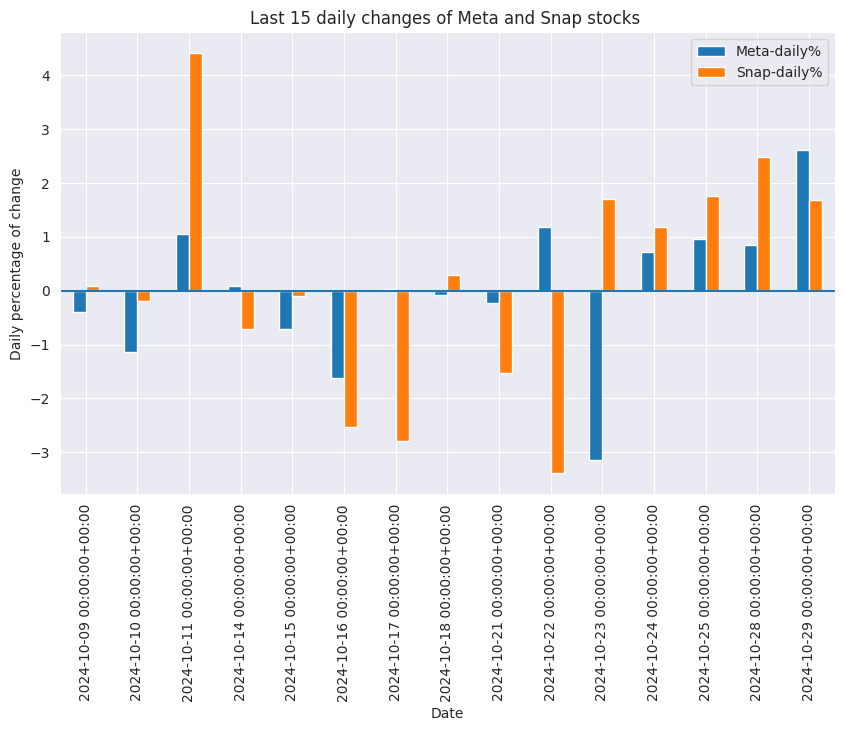

In [73]:
### Display the last 15 changes

(changes[-15:]*100).plot.bar(figsize=(10, 6))

### Vertical axis title
plt.ylabel('Daily percentage of change')

### Add a horisontal line at zero

plt.title('Last 15 daily changes of Meta and Snap stocks ')

plt.axhline()

In [74]:
### Statistical numbers for percentages of changes

(changes*100).describe().round(2)

,Meta-daily%,Snap-daily%
count,1718.00,1718.00
mean,0.10,0.10
std,2.66,4.76
min,-26.39,-43.08
25%,-1.09,-1.93
50%,0.12,0.05
75%,1.38,2.02
max,23.28,58.82


<Axes: >

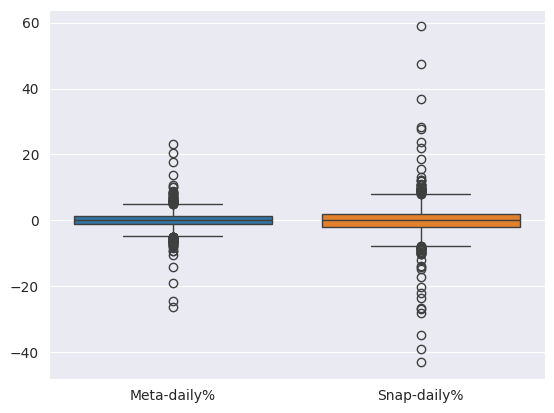

In [75]:
### comparison of percentages of change graphically;

sns.boxplot(data = changes*100)

Next we find the days when the percentage of change has been greater than fifteen per cent.

In [83]:
changes[(abs(changes['Meta-daily%']) > 0.15) | (abs(changes['Snap-daily%']) > 0.15)]

,Meta-daily%,Snap-daily%
Date,,
2018-02-07 00:00:00+00:00,-0.027683,0.475818
2018-05-02 00:00:00+00:00,0.012711,-0.219391
2018-07-26 00:00:00+00:00,-0.189609,-0.001494
2019-02-06 00:00:00+00:00,-0.003914,0.220170
2019-07-24 00:00:00+00:00,0.011366,0.187458
2020-03-16 00:00:00+00:00,-0.142530,-0.201762
2020-04-22 00:00:00+00:00,0.067213,0.367363
2020-10-21 00:00:00+00:00,0.041748,0.282953
2021-07-23 00:00:00+00:00,0.052963,0.238209


## Correlation between percentages of changes

Percentages of changes of Meta and Snap have a positive correlation.


In [84]:
### Calculate correlations

changes.corr()

,Meta-daily%,Snap-daily%
Meta-daily%,1.000000,0.404401
Snap-daily%,0.404401,1.000000


<Axes: xlabel='Meta-daily%', ylabel='Snap-daily%'>

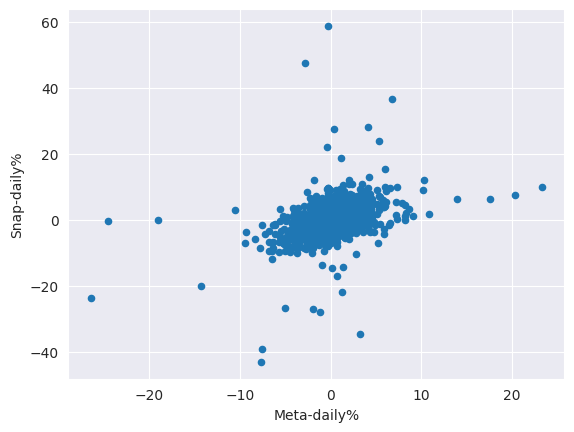

In [86]:
### Positive correlation between percentages of changes can be seen in the scatter chart

(changes*100).plot.scatter(x = 'Meta-daily%', y = 'Snap-daily%')

<Axes: xlabel='Date'>

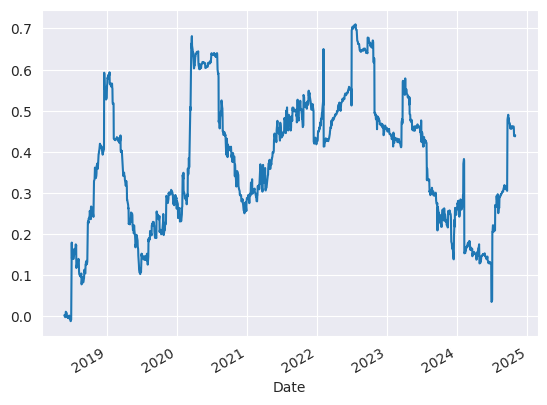

In [87]:
### Moving correlation describes how percentages of changes correlate at different times

changes['Meta-daily%'].rolling(100).corr(changes['Snap-daily%']).plot()

## Moving volatility

Volatility describes the overall risk of a stock. It is announced as annual if the observation period is at least one year.

When calculating volatility standard deviation (std()) of percentage numbers of daily changes is determined and then it is transform to be annual when the deviation is multiplied by a square root of a factor that depends on the ratio of observation and destination data. In the following, this factor is assumed to be 254.

<Axes: xlabel='Date'>

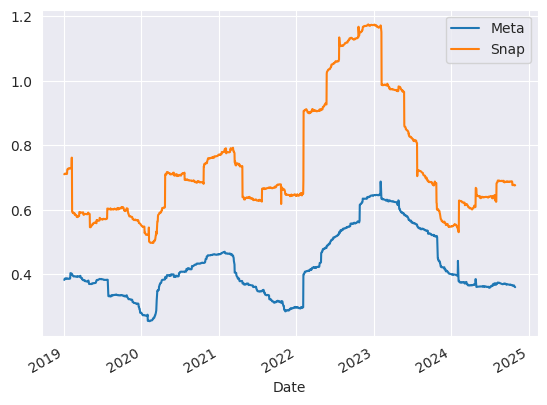

In [89]:
### Examples of moving volatility of 252 days

### Meta stock
(changes['Meta-daily%'].rolling(252).std() * (254**0.5)).plot(label = 'Meta', legend = True)

### Snap stock
(changes['Snap-daily%'].rolling(252).std() * (254**0.5)).plot(label = 'Snap', legend = True)

## Line chart with two axis

Text(0.5, 1.0, 'Meta and Snap share prices development')

<Figure size 1000x1000 with 0 Axes>

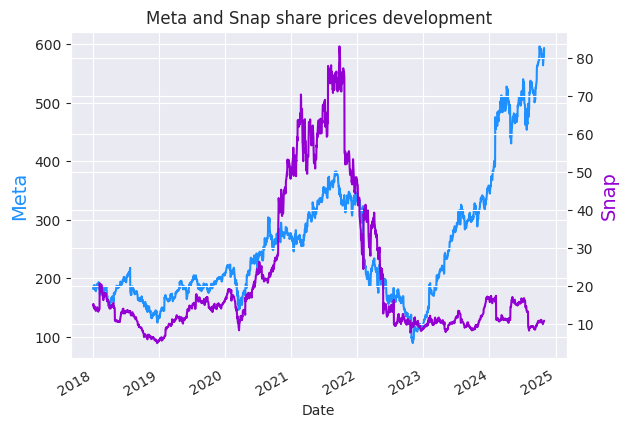

In [93]:
### Figure size

plt.figure(figsize=(10,10))

### Line chart of Meta stocks closing prices.

axe = meta['Close'].plot(color = 'dodgerblue', legend = False)

### Add name for Meta, colour and font size.

plt.ylabel('Meta', color = 'dodgerblue', fontsize = 14)


### Next we create another axes object (called axt) and determine it to have a common x-axis with the object axe.

axt = axe.twinx()

### Line chart of Snap stock closing prices

snap['Close'].plot(ax = axt, color ='darkviolet', legend = False)

### Add name for Snap, colour and font size.

plt.ylabel('Snap', color = 'darkviolet', fontsize = 14)


### Chart title

plt.title('Meta and Snap share prices development')



## Is there a connection between weekdays and profit rate?


In [94]:
### Add weekdays to a column of their own (zero = Monday)

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']

changes['Weekday'] = changes.index.weekday

### Meta's statistical numbers by weekdays

meta_weekday = changes.groupby('Weekday')['Meta-daily%'].describe()
meta_weekday.index = weekdays

meta_weekday

,count,mean,std,min,25%,50%,75%,max
Mon,320.0,0.000335,0.023488,-0.142530,-0.010942,0.002133,0.014721,0.073745
Tue,354.0,0.001520,0.020903,-0.093691,-0.010055,0.000354,0.013579,0.086968
Wed,351.0,0.001758,0.023823,-0.077723,-0.010477,0.000436,0.013360,0.083227
Thu,348.0,0.001234,0.037165,-0.263901,-0.012697,0.002020,0.014315,0.232824
Fri,345.0,0.000316,0.024410,-0.083164,-0.011871,-0.000212,0.011762,0.203176


In [95]:
### Snap's statistical numbers by weekdays

snap_weekday = changes.groupby('Weekday')['Snap-daily%'].describe()
snap_weekday.index = weekdays

snap_weekday

,count,mean,std,min,25%,50%,75%,max
Mon,320.0,-0.001194,0.035176,-0.201762,-0.020066,-0.000968,0.018600,0.119816
Tue,354.0,-0.000062,0.039518,-0.430797,-0.019641,-0.000678,0.018932,0.155235
Wed,351.0,0.001155,0.058326,-0.346132,-0.023332,0.000656,0.019513,0.475818
Thu,348.0,0.003137,0.038745,-0.236046,-0.016455,0.002111,0.025932,0.131422
Fri,345.0,0.001600,0.059687,-0.390826,-0.016246,0.001876,0.019459,0.588163


Next we perform statistical tests whether there are statistically significances difference between percentages of changes of certain days.

In [96]:
### First test is applied to percentages of change of Meta shares
### Test whether there is statistically significant difference between Monday and Thursday

### Form the groups to be compared

earlier_day = changes['Meta-daily%'][changes['Weekday']==0]
later_day = changes['Meta-daily%'][changes['Weekday']==3]

# T-test of two independent (ind) samples
from scipy.stats import ttest_ind
ttest_ind(earlier_day, later_day, equal_var=False, nan_policy='omit')

TtestResult(statistic=-0.3768498252195304, pvalue=0.7064201693947227, df=592.3495858999108)

The t-test comparing the percentage change of Meta shares between Monday and Thursday yielded a p-value of **0.706**. This p-value is greater than the commonly used significance level of 0.05. Therefore, we fail to reject the null hypothesis and conclude that there is no statistically significant difference in the percentage change of Meta shares between Monday and Thursday.

In [99]:
### First test is applied to percentages of change of Snap shares
### Test whether there is statistically significant difference between Monday and Thursday

### Form the groups to be compared

earlier_day = changes['Snap-daily%'][changes['Weekday']==0]
later_day = changes['Snap-daily%'][changes['Weekday']==3]

# T-test of two independent (ind) samples
from scipy.stats import ttest_ind
ttest_ind(earlier_day, later_day, equal_var=False, nan_policy='omit')

TtestResult(statistic=-1.5142240687034332, pvalue=0.13044350600004997, df=665.8938838850285)

The t-test comparing the percentage change of Snap shares between Monday and Thursday yielded a p-value of **0.130**. This p-value is greater than the commonly used significance level of 0.05. Therefore, we fail to reject the null hypothesis and conclude that there is no statistically significant difference in the percentage change of Snap shares between Monday and Thursday.

# Forecast Meta

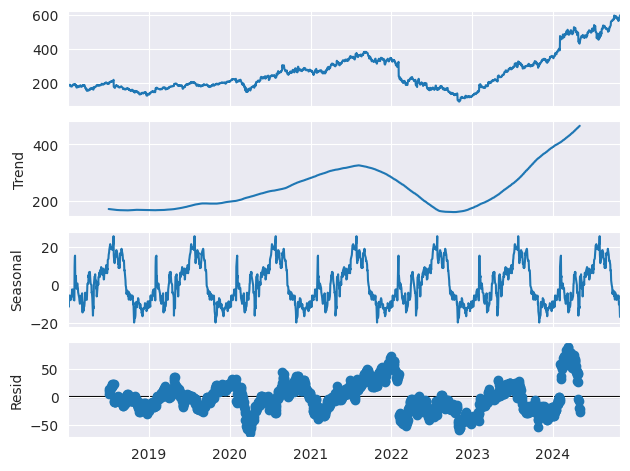

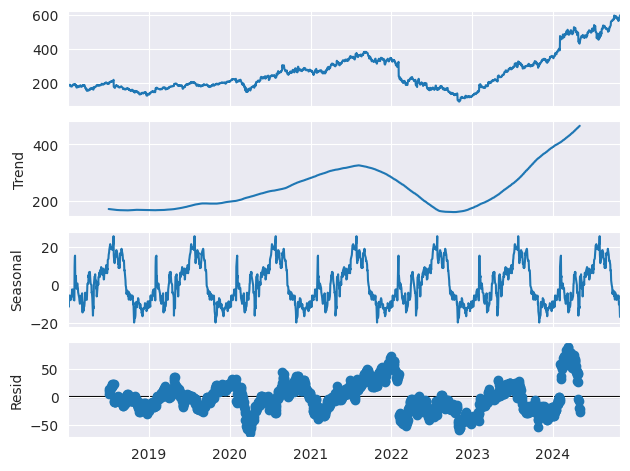

In [5]:
from statsmodels.tsa.api import seasonal_decompose

seasonal_decompose(meta['Close'], model = 'add', period = 252).plot()

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### Fitting the double exponential smoothing model into the object named model.
### Addition model is used in this example.

model = ExponentialSmoothing(meta['Close'], trend='add', seasonal='mul', seasonal_periods=5).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [30]:
### The object called model gives us the simulated predictions according to the exponential smoothing model (fittedvalues).

meta['Forecast'] = model.fittedvalues

meta

Price,Adj Close,Close,High,Low,Open,Volume,Forecast
Ticker,META,META,META,META,META,META,
Date,,,,,,,
2018-01-02 00:00:00+00:00,180.875397,181.419998,181.580002,177.550003,177.679993,18151900,181.571484
2018-01-03 00:00:00+00:00,184.115646,184.669998,184.779999,181.330002,181.880005,16886600,181.747638
2018-01-04 00:00:00+00:00,183.776672,184.330002,186.210007,184.100006,184.899994,13880900,184.441731
2018-01-05 00:00:00+00:00,186.289108,186.850006,186.899994,184.929993,185.589996,13574500,183.997955
2018-01-08 00:00:00+00:00,187.714813,188.279999,188.899994,186.330002,187.199997,17994700,187.031231
...,...,...,...,...,...,...,...
2024-10-24 00:00:00+00:00,567.780029,567.780029,568.880005,561.520020,567.130005,7184700,566.161634
2024-10-25 00:00:00+00:00,573.250000,573.250000,581.289978,571.719971,573.929993,11337900,568.089408


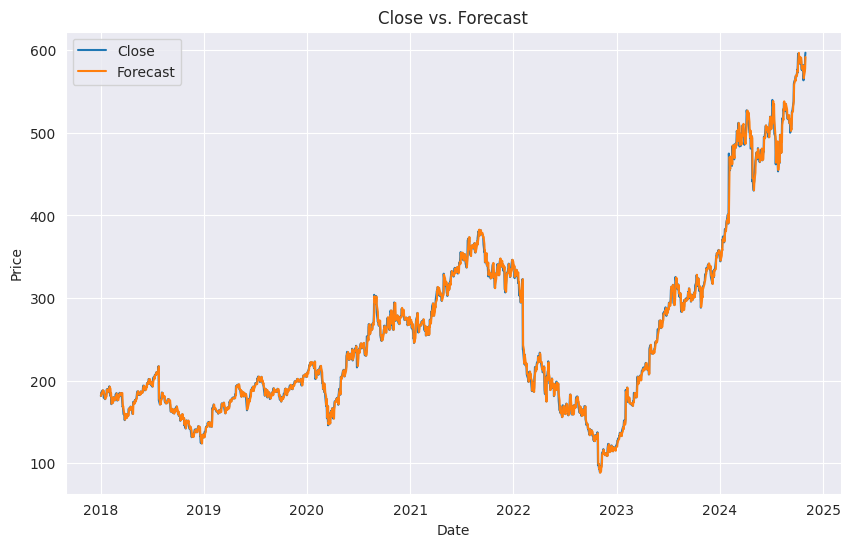

In [31]:
# Plotting the data

plt.figure(figsize=(10, 6))
plt.plot(meta.index, meta['Close'], label='Close')
plt.plot(meta.index, meta['Forecast'], label='Forecast')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close vs. Forecast')
plt.legend()
plt.show()

The forecast model for Meta's stock price shown here **performs quite well**. The forecasted values (orange line) closely follow the actual closing prices (blue line) throughout the observed period. This close alignment suggests that the model effectively captures both short-term fluctuations and longer-term trends in the stock's movement. Key observations include:

* *Trend Capture:* The model successfully tracks
the large upward trends in late 2022 and 2023, indicating that it captures the general price momentum.
* *Volatility and Seasonality:* It appears to capture the minor seasonal variations and volatility typical in stock prices, even during periods of high fluctuation (e.g., early 2023).
* *Tight Fit:* The overlap between the forecast and actual values indicates a low error rate, suggesting a high level of accuracy for short-term predictions.

## Calculate forecasts


In [16]:
# check the last date in the data

meta.tail()

Price,Adj Close,Close,High,Low,Open,Volume,Forecast
Ticker,META,META,META,META,META,META,
Date,,,,,,,
2024-10-24 00:00:00+00:00,567.780029,567.780029,568.880005,561.520020,567.130005,7184700,566.207297
2024-10-25 00:00:00+00:00,573.250000,573.250000,581.289978,571.719971,573.929993,11337900,561.249864
2024-10-28 00:00:00+00:00,578.159973,578.159973,583.750000,574.119995,582.000000,10925100,576.165807
2024-10-29 00:00:00+00:00,593.280029,593.280029,593.669983,575.400024,580.150024,12869300,580.282067
2024-10-30 00:00:00+00:00,597.080017,597.080017,601.200012,592.070007,601.200012,7121859,591.263627


In [33]:
# Generate a business day date range for the next 30 days
index = pd.date_range(start=meta.index[-1] + pd.DateOffset(days=1), periods=30, freq='B')

# Generate forecasts for the next 30 business days
forecasts = model.forecast(30)

# Create a DataFrame for the forecasts with business day frequency
df_forecast = pd.DataFrame(data=forecasts, index=index, columns=['Forecast'])

df_forecast

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,Forecast
2024-10-31 00:00:00+00:00,NaN
2024-11-01 00:00:00+00:00,NaN
2024-11-04 00:00:00+00:00,NaN
2024-11-05 00:00:00+00:00,NaN
2024-11-06 00:00:00+00:00,NaN
2024-11-07 00:00:00+00:00,NaN
2024-11-08 00:00:00+00:00,NaN
2024-11-11 00:00:00+00:00,NaN
2024-11-12 00:00:00+00:00,NaN
2024-11-13 00:00:00+00:00,NaN
